#**ANN(Artificial Neural Network)**

##**Neural Network:** 

A Neural Network is a series of algorithms that try to mimic a human brain and finds the relationship between the sets of data.

It is being used in various use-cases like:
  * Regression.
  * Classification.
  * Image Recognition and many more...

###**Note:**
Major difference between the biological neural network and artificial neural network:
  * BNN performs parallel processing whereas ANN performs Series processing.
  * BNN due to parallel processing performs processing in milliseconds(slower), whereas ANN because of series processing is faster and performs processing in nanoseconds.

##**Architecture of ANN**:

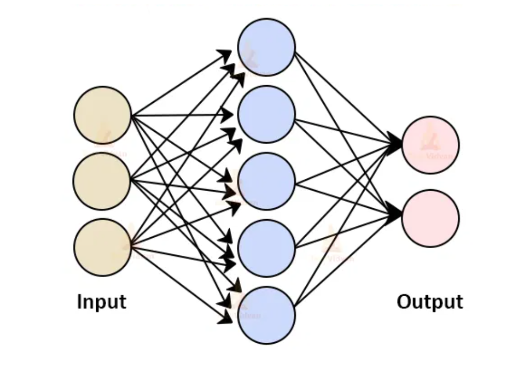

A neural network has many layers and each layer performs a specific function, and as the number of layers in an ANN increases, its complexity also increases.
It is also known by the name of "**Multi-Layer Perceptron.**"

The purest form of a neural network has three layers:
  * **Input Layer:** The input layer picks up the input signals and transfers them to the next layer.
  * **Hidden Layer:** It recieves the signals from the input layer and upon processing transfers them to the next layer.
  * **Output Layer:** The output layer finally gives the final prediction.

##**About Perceptron**:

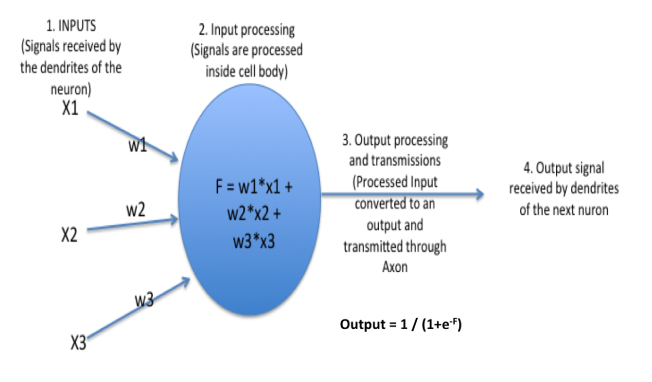

As we discussed earlier, ANN is a multi-layered perceptron. In the above picture we can see a neuron's detail view.
Every neuron has some weights and in the above picture it is w1,w2,w3 and biases.
Based on the weights and biases the computaion are performed which is basically **linear combination = bias + weights*input** i.e F = w1*x1 + w2*x2 +w3*x3 .
Finally after the linear combination of input and weights, bias; an activation function is applied:
  ** output = activation(linear combination)**

In the above picture, the activation function depicted is the sigmoid activation function.

There are other activation functions as well like: ReLU,tanh, LeakyReLU etc..

##**Working of ANN:**

At First, information is feed into the input layer which then transfers it to the hidden layers and interconnection between these two layers assign weights to each input randomly at the initial point & then bias is aded to each input neuron and after this, the weighted sum which is a linear combination of weights and bias is passed through the activation function.

Activation Function has the repsonsibility of which node to fire for feature extractin and finally output is calculated.
This whole process is known as **Forward Propagation.**

After getting the output model to compare it with the original output and the error is known and finally weights are upadated in backward propagation to reduce the error. This process continues for a certain number of epochs(iteration).
Finally model weights get updated and prediction is done.

##**Advantages:**

  * ANN has the ability to learn and model non-linear as well as complex relationships (as many relationships ) between input and output are non-linear.
  * After training, ANN can infer unseen relationships from unseen data and hence it is generalised.
  * Unlike many machine learning models, ANN does not have restrictions on datasets like data should be Gaussian distributed or nay other distribution.

##**Applications:**
There are many applicatioins of ANN, some of them are:
  * Image preprocessing and character recognition.
  * Forecasting.
  * Credit rating.
  * Fraud Detection.
  * Portfolio management.



##**Let's Dive into the coding part:**

For this we will be using the Diabetes dataset. This dataset tells about the patient medical record and whether they had diabetes or not within five years.It is a binary classsification problem.

In [32]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
from sklearn.metrics import ConfusionMatrixDisplay


from keras.models import Sequential 
from keras.layers import Dense

In [2]:
df = pd.read_csv('/content/diabetes.csv')
df.shape

(768, 9)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.replace('?',np.nan,inplace = True)
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

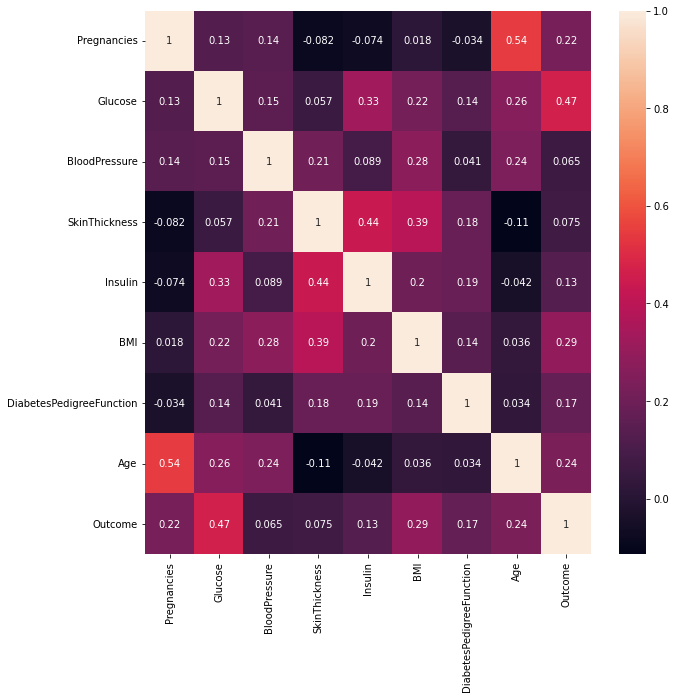

In [10]:
corre = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corre,annot = True)

In [11]:
y = df['Outcome']
X = df.drop('Outcome',axis = 1)
X.shape,y.shape

((768, 8), (768,))

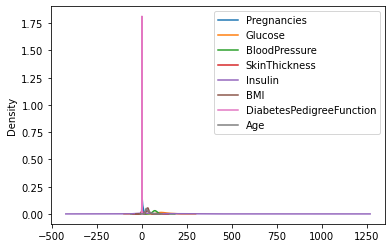

In [13]:
X.plot.kde()

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,shuffle = True)
X_train.shape,X_test.shape

((614, 8), (154, 8))

In [17]:
ss = StandardScaler() 
X_train_ss = ss.fit_transform(X_train) 
X_test_ss = ss.transform(X_test) 

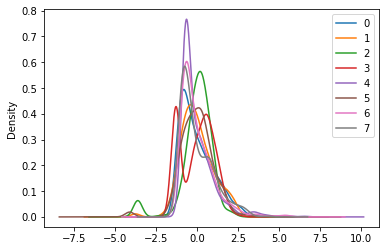

In [18]:
pd.DataFrame(X_train_ss).plot.kde()

In [19]:
model = Sequential()
model.add(Dense(12,input_dim = 8, activation = 'relu'))
model.add(Dense(8,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))


In [20]:
model.compile(loss = 'binary_crossentropy',optimizer = 'adam', metrics = ['accuracy'])

In [23]:
model.fit(X_train_ss,y_train,epochs = 350,batch_size = 10)

Epoch 1/350
62/62 [==============================] - 0s 3ms/step - loss: 0.3442 - accuracy: 0.8306
Epoch 2/350
62/62 [==============================] - 0s 2ms/step - loss: 0.3437 - accuracy: 0.8274
Epoch 3/350
62/62 [==============================] - 0s 3ms/step - loss: 0.3442 - accuracy: 0.8322
Epoch 4/350
62/62 [==============================] - 0s 3ms/step - loss: 0.3457 - accuracy: 0.8274
Epoch 5/350
62/62 [==============================] - 0s 4ms/step - loss: 0.3421 - accuracy: 0.8355
Epoch 6/350
62/62 [==============================] - 0s 3ms/step - loss: 0.3425 - accuracy: 0.8322
Epoch 7/350
62/62 [==============================] - 0s 3ms/step - loss: 0.3429 - accuracy: 0.8290
Epoch 8/350
62/62 [==============================] - 0s 3ms/step - loss: 0.3425 - accuracy: 0.8306
Epoch 9/350
62/62 [==============================] - 0s 3ms/step - loss: 0.3413 - accuracy: 0.8322
Epoch 10/350
62/62 [==============================] - 0s 4ms/step - loss: 0.3407 - accuracy: 0.8339
Epoch 11/

In [27]:
train_Loss,train_accuracy = model.evaluate(X_train_ss,y_train)

20/20 [==============================] - 0s 1ms/step - loss: 0.2541 - accuracy: 0.8909


In [28]:
print('Training Loss:',train_Loss,'Training Accuracy:',train_accuracy)


Training Loss: 0.2541125416755676 Training Accuracy: 0.8908794522285461


In [29]:
test_pred = model.predict(X_test_ss)
test_pred.shape

5/5 [==============================] - 0s 3ms/step


(154, 1)

In [41]:
type(y_test)

pandas.core.series.Series

In [48]:
final_pred =[] #if probability is >0.5 then 1-Has diabetes else 0-No diabetes
for i in test_pred:
  if i[0]>0.5:
    final_pred.append(1)
  else:
    final_pred.append(0)

In [49]:
final_pred = np.array(final_pred)

In [50]:
final_pred.shape

(154,)

In [51]:
print('Testing Score:',accuracy_score(y_test,final_pred))

Testing Score: 0.7532467532467533


              precision    recall  f1-score   support

           0       0.75      0.88      0.81        93
           1       0.76      0.56      0.64        61

    accuracy                           0.75       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.75      0.75      0.74       154



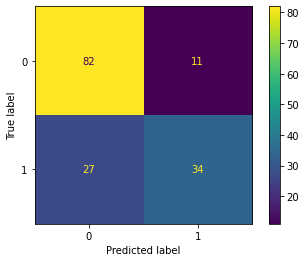

In [54]:
print(classification_report(y_test,final_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,final_pred))